#### **Clasificador de Galaxias por medio de RNN**
En El siguiente documento estaremos realizando la exploracion de la informacion del data-set de galaxy zoo, tanto la primera version como la version del telescopio de Hubble.

In [1]:
######################################################################################################################################################
# Importación de librerías, modelos y rutas                                                                                                          #
######################################################################################################################################################

from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import astropy.units as u
import pandas as pd
import cv2
import numpy as np

# Ruta de imágenes
image_path="./data-set/"
# Ruta de los CSV
information_path="./information/"

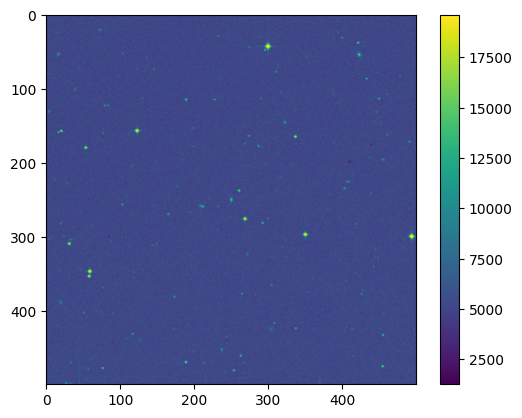

In [3]:
######################################################################################################################################################
# Ejemplo de manejo de datos espaciales del telescopio DSS para la inspección de las características                                                 #
######################################################################################################################################################

# Coordenadas de la galaxia (RA y DEC)
ra="00:00:00.74"
dec="-09:13:20.2"
coord=SkyCoord(ra, dec, unit=(u.hourangle, u.deg), frame="icrs")

# Obtén la imagen usando SkyView (puedes elegir DSS, Hubble, etc.)
images=SkyView.get_images(position=coord, survey="DSS", pixels=500)

# Muestra la primera imagen obtenida
image=images[0][0]

# Visualiza la imagen a color
plt.imshow(image.data)
plt.colorbar()
plt.show()

In [2]:
######################################################################################################################################################
# Ejemplo de manejo de datos espaciales del telescopio DSS para la inspección de las características                                                 #
######################################################################################################################################################

# Carga el CSV de características
df_characteristics=pd.read_csv(f"{information_path}characteristics.csv")
# Carga el CSV de nombres
df_name=pd.read_csv(f"{information_path}names.csv")

# Capturamos todos los tipos de galaxias únicos para todo el dataset
types=df_characteristics["gz2_class"].unique()
with open("types.txt", "a") as file:
    for type_ in types:
        file.write(f"{type_}\n")

with open("types.txt", "r") as file:
    print(len(str(file.read())))

6266


SBc


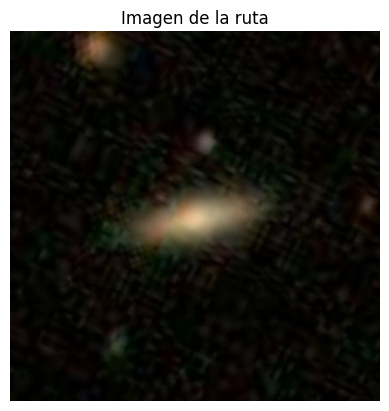

In [6]:
# Hacemos un plot de una imagen arbitraria y desplegamos su información esencial
example_image=df_characteristics[df_characteristics["dr7objid"]==587722981741756579]
print(example_image["gz2_class"].iloc[0])

example_image_path=df_name[df_name["objid"]==587722981741756579]
example_image_path=f"{image_path}126579.jpg"
plt.imshow(mpimg.imread(example_image_path))
plt.axis("off")
plt.title("Imagen de la ruta")
plt.show()

Tamaño de la imagen: 424x424 píxeles


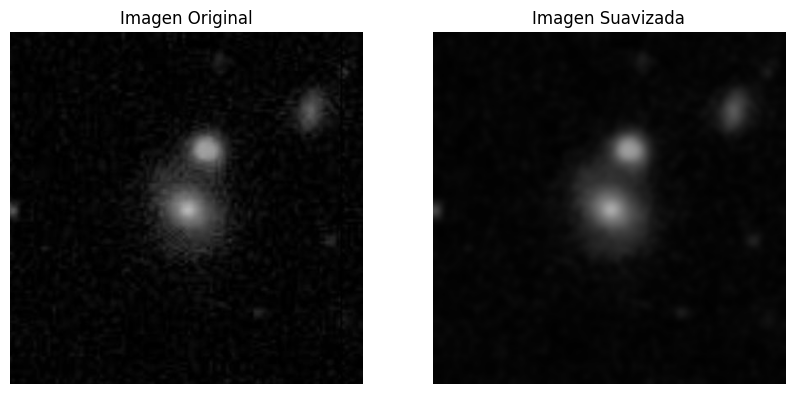

In [4]:
######################################################################################################################################################
# Procesamiento de imagenes y analisis morfologico                                                                                                   #
######################################################################################################################################################

img=Image.open(example_image_path)
ancho, alto=img.size
print(f"Tamaño de la imagen: {ancho}x{alto} píxeles")
# Suavisado de la imagen
img=cv2.imread(example_image_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imagen_suavizada=cv2.GaussianBlur(img, (21, 21), 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_suavizada, cv2.COLOR_BGR2RGB))
plt.title("Imagen Suavizada")
plt.axis('off')

plt.show()